# Perform clustering (Both hierarchical and K means clustering) for the airlines data to obtain optimum number of clusters. 
Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:

cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:

cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000 

2 = 5,000 - 10,000 

3 = 10,001 - 25,000 

4 = 25,001 - 50,000 

5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [1]:
import pandas as pd
import matplotlib.pylab as plt 
import numpy as np

In [2]:
air = pd.read_excel(r"C:\Excelr Data\Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')

In [3]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x) 

In [5]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(air.iloc[:,1:])

In [6]:
df_norm.head(10)  # Top 10 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.098230,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.098230,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.098230,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.098230,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.098230,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
5,-0.567412,-0.186275,-0.769482,-0.098230,-0.062759,-0.709903,-1.208052,-0.328562,-0.362123,1.367195,-0.766823
6,0.112256,-0.186275,0.683036,-0.098230,-0.062759,0.428022,1.395082,-0.328562,-0.362123,1.392374,-0.766823
7,-0.523393,-0.186275,-0.769482,-0.098230,-0.062759,-0.492520,-0.791550,-0.150017,-0.098491,1.365258,1.303755
8,3.665584,-0.186275,0.683036,6.674532,-0.062759,-0.637318,3.269338,2.421027,2.801456,1.370100,1.303755
9,0.310181,-0.186275,0.683036,-0.098230,-0.062759,0.467110,1.707458,0.492744,0.428772,1.361868,1.303755


In [7]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 


In [8]:
type(df_norm)

pandas.core.frame.DataFrame

In [9]:
p = np.array(df_norm) # converting into numpy array format 
#help(linkage)

In [10]:
z = linkage(df_norm, method="complete",metric="euclidean")

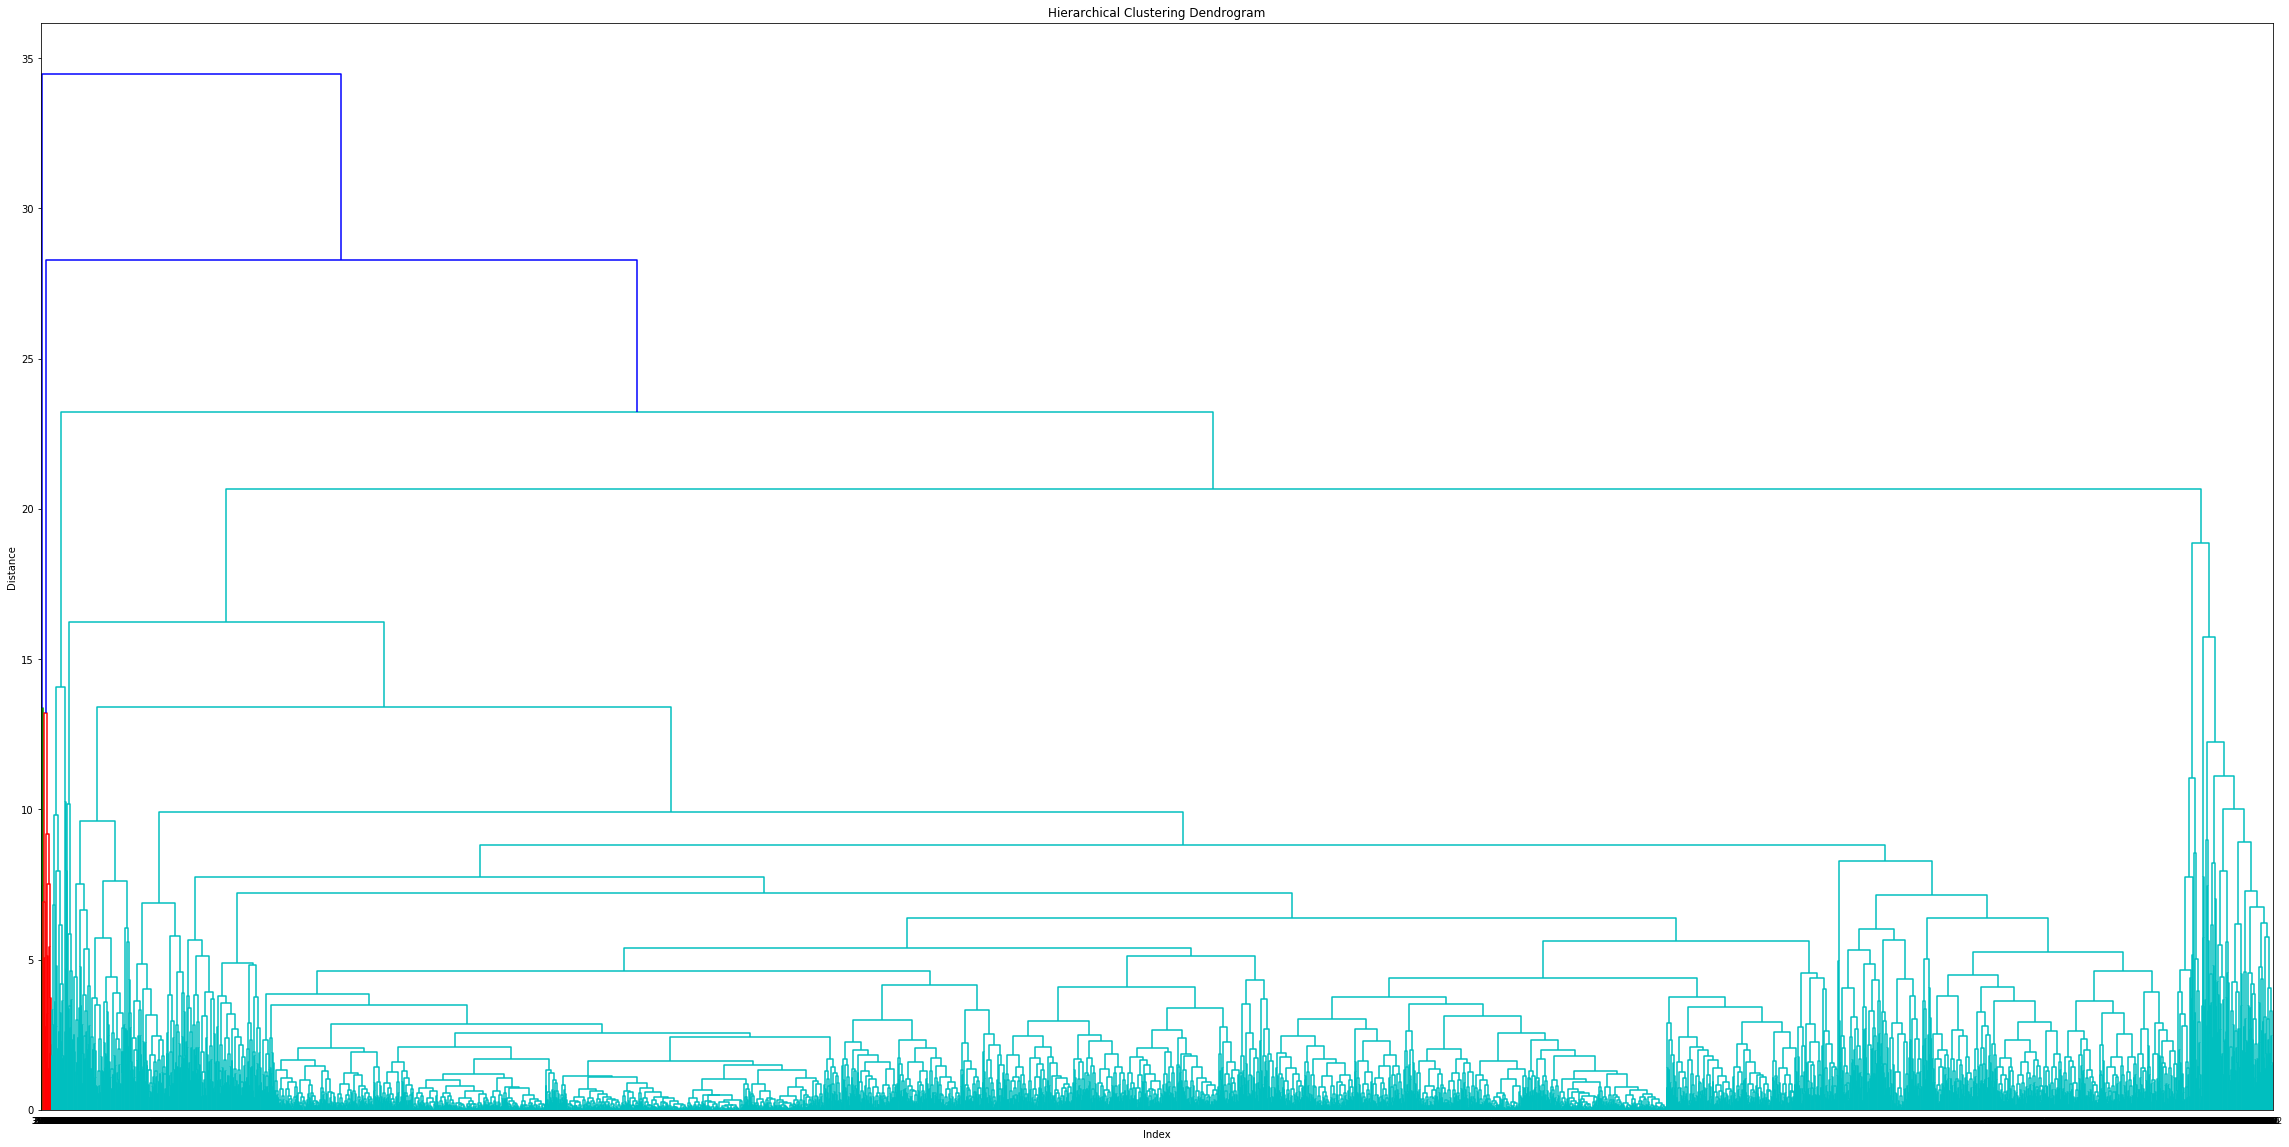

In [11]:
plt.figure(figsize=(40,20 ));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(
    z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()


In [126]:
# Now applying AgglomerativeClustering choosing 3 as clusters from the dendrogram
from	sklearn.cluster	import	AgglomerativeClustering 
h_complete	=	AgglomerativeClustering(n_clusters=10,	linkage='complete',affinity = "euclidean").fit(df_norm) 


In [127]:
h_complete.labels_

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [128]:
cluster_labels=pd.Series(h_complete.labels_)

In [129]:
cluster_labels.value_counts()

4    3666
1     122
9     105
5      43
8      23
2      15
6      11
7       5
3       5
0       4
dtype: int64

In [130]:
air['clust']=cluster_labels # creating a  new column and assigning it to new column 

In [131]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,4
1,2,19244,0,1,1,1,215,2,0,0,6968,0,4
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,4
3,4,14776,0,1,1,1,500,1,0,0,6952,0,4
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,4
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,4


In [132]:
air = air.iloc[:,[12,0,2,1,3,4,5,6,7,8,9,10,11]]

In [133]:
air.head()

,clust,ID#,Qual_miles,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,4,1,0,28143,1,1,1,174,1,0,0,7000,0
1,4,2,0,19244,1,1,1,215,2,0,0,6968,0
2,4,3,0,41354,1,1,1,4123,4,0,0,7034,0
3,4,4,0,14776,1,1,1,500,1,0,0,6952,0
4,4,5,0,97752,4,1,1,43300,26,2077,4,6935,1


In [134]:
# getting aggregate mean of each cluster
air.groupby(air.clust).mean()


,ID#,Qual_miles,Balance,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust,,,,,,,,,,,,
0,3128.000000,347.000000,1.319995e+05,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000
1,1550.139344,348.180328,1.315281e+05,2.565574,1.000000,1.000000,37762.426230,29.983607,5375.065574,15.581967,4950.565574,0.803279
2,1664.866667,78.800000,1.380614e+05,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,389.200000,1941.200000,1.212650e+06,2.600000,1.000000,1.000000,35308.800000,25.800000,3254.600000,15.000000,7845.800000,1.000000
4,2039.455810,25.515276,6.483810e+04,2.048009,1.000000,1.000818,15685.246045,10.735679,253.713857,0.762684,4069.739498,0.343426
5,2269.372093,23.255814,6.887658e+04,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
6,1281.363636,8720.727273,1.423762e+05,2.181818,1.000000,1.000000,15125.363636,15.454545,1336.454545,4.000000,5349.363636,0.818182
7,1577.400000,0.000000,1.805792e+05,4.200000,1.000000,1.000000,225128.000000,26.400000,2103.000000,4.800000,4930.800000,1.000000
8,760.565217,44.521739,7.181254e+05,3.782609,1.000000,1.000000,63434.826087,20.217391,929.130435,3.565217,6616.347826,0.826087


In [139]:
# creating a csv file 
air.to_csv("EastWestAirlines.csv") #,encoding="utf-8")


## kmeans Clustering

In [37]:
import pandas as pd
import matplotlib.pylab as plt
from	sklearn.cluster	import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [38]:
air = pd.read_excel(r"C:\Excelr Data\Assignments\Clustering\EastWestAirlines.xlsx",sheet_name='data')

In [39]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [40]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x) 

In [41]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(air.iloc[:,1:])

In [42]:
df_norm.head(5)  # Top 5 rows

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755


In [43]:
###### screw plot or elbow curve ############
k = list(range(10,50))
#k

In [44]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))


([<matplotlib.axis.XTick at 0x29909eefec8>,
 <a list of 40 Text xticklabel objects>)

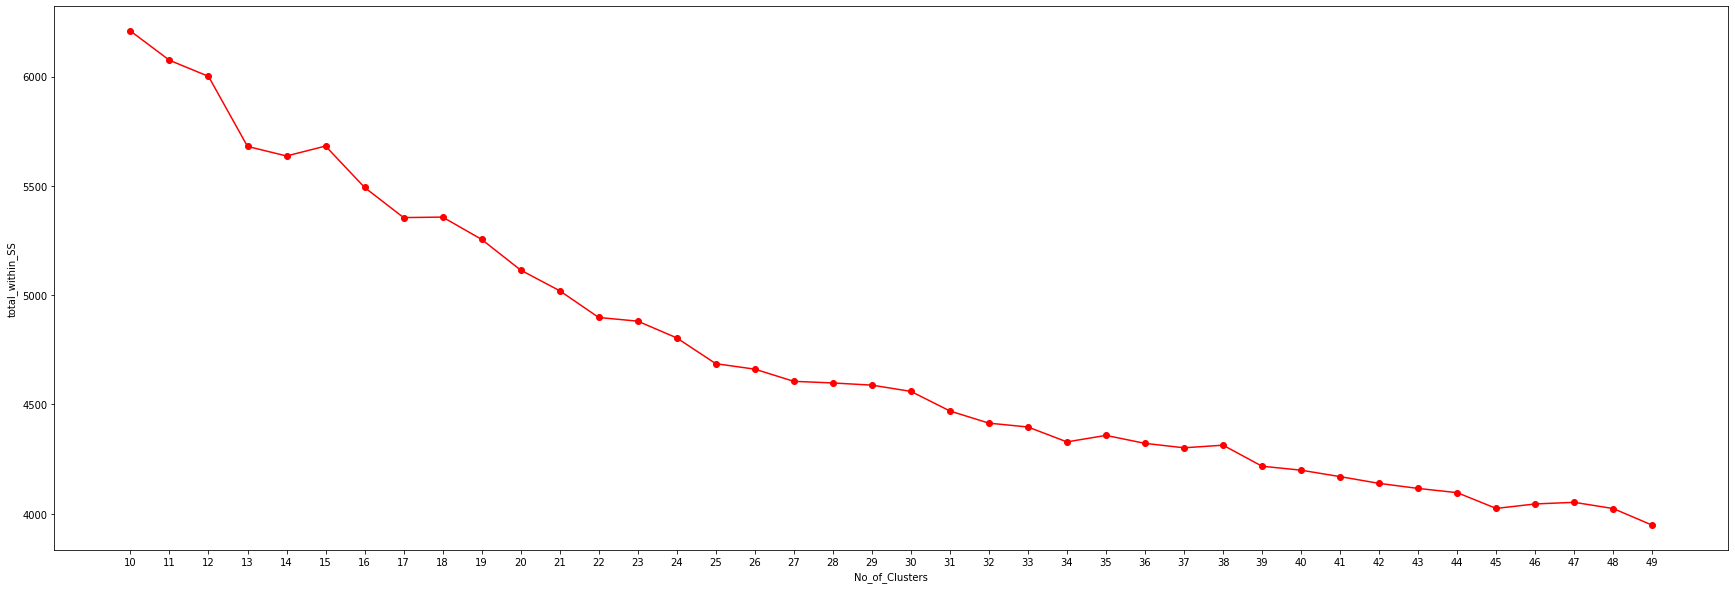

In [45]:
# Scree plot 
plt.figure(figsize=(30,10 ));
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)


In [46]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=13) 

In [47]:
model.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=13, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [48]:
model.labels_ # getting the labels of clusters assigned to each row 

array([11, 11, 11, ...,  0,  1,  1])

In [49]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object 
md

0       11
1       11
2       11
3       11
4        5
        ..
3994     4
3995     4
3996     0
3997     1
3998     1
Length: 3999, dtype: int32

In [50]:
air['clust']=md # creating a  new column and assigning it to new column 

In [51]:
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust
0,1,28143,0,1,1,1,174,1,0,0,7000,0,11
1,2,19244,0,1,1,1,215,2,0,0,6968,0,11
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,11
3,4,14776,0,1,1,1,500,1,0,0,6952,0,11
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,4
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1


In [55]:
#df_norm.head()

In [52]:
air = air.iloc[:,[12,0,1,2,3,4,5,6,7,8,9,10,11]]
air

,clust,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,11,1,28143,0,1,1,1,174,1,0,0,7000,0
1,11,2,19244,0,1,1,1,215,2,0,0,6968,0
2,11,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,11,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,0,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,1,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [53]:
air.iloc[:,1:12].groupby(air.clust).mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
clust,,,,,,,,,,,
0,1811.818526,65065.510397,67.281664,3.455577,1.000000,1.000000,29295.778828,17.644612,231.990548,0.680529,4505.160681
1,3196.767347,30819.001020,38.069388,1.092857,1.000000,1.000000,2905.191837,5.575510,96.611224,0.341837,1988.988776
2,1869.408333,105264.660000,19.210000,3.345000,1.000000,1.001667,27194.595000,17.181667,157.078333,0.428333,4390.058333
3,880.205128,715539.307692,325.179487,3.538462,1.000000,1.000000,56486.333333,20.948718,1295.538462,4.948718,6393.358974
4,1929.474000,55223.728000,106.924000,1.160000,1.000000,1.000000,6087.478000,7.154000,268.886000,0.898000,4270.822000
5,1216.183333,154963.900000,119.537500,4.825000,1.000000,1.004167,77194.525000,23.620833,636.391667,2.029167,5574.375000
6,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
7,1624.351852,151155.074074,494.185185,2.481481,1.000000,1.000000,38897.611111,32.722222,7508.370370,21.740741,4748.722222
8,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233


In [54]:
air.to_csv("air.csv")